### The Sunspot dataset is available on https://www.kaggle.com/robervalt/sunspots. In this notebook, I have performed one-month ahead prediction using 24 time-steps or past observations.

### 1. Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


C:\Users\anjali gautam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Read the dataset 

In [2]:
df=pd.read_csv('Desktop/Time Series Dataset/Sunspots.csv')
df

,Index,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3247,3247,31-08-2019,0.5
3248,3248,30-09-2019,1.1
3249,3249,31-10-2019,0.4
3250,3250,30-11-2019,0.5


### 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Index                              3252 non-null   int64  
 1   Date                               3252 non-null   object 
 2   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.3+ KB


In [4]:
df.describe()

,Index,Monthly Mean Total Sunspot Number
count,3252.000000,3252.000000
mean,1625.500000,82.070695
std,938.915864,67.864736
min,0.000000,0.000000
25%,812.750000,24.200000
50%,1625.500000,67.750000
75%,2438.250000,122.700000
max,3251.000000,398.200000


### 4. Data Preprocessing

In [5]:
# To drop the irrelevant features
df=df.drop(columns=['Index','Date'],axis=1)

In [6]:
df

,Monthly Mean Total Sunspot Number
0,96.7
1,104.3
2,116.7
3,92.8
4,141.7
...,...
3247,0.5
3248,1.1
3249,0.4
3250,0.5


In [7]:
df.isna().sum()   # To check the missing or Nan values.

Monthly Mean Total Sunspot Number    0
dtype: int64

In [8]:
df

,Monthly Mean Total Sunspot Number
0,96.7
1,104.3
2,116.7
3,92.8
4,141.7
...,...
3247,0.5
3248,1.1
3249,0.4
3250,0.5


### 5. Data Visualization

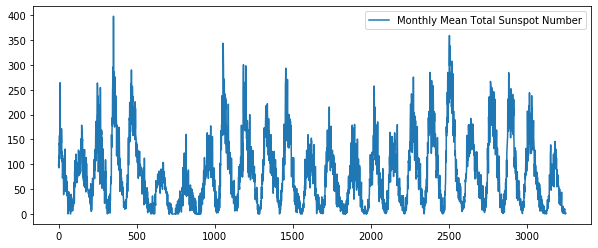

In [9]:
df.plot(figsize=(10,4))

### 6. Train-test Split

In [10]:
x=int(0.8*len(df))
train_data=df.iloc[:x]
print(len(train_data))
test_data=df.iloc[x:]
print(len(test_data))

2601
651


### 7. Normalizing the data and convert the normalized data as supervised form(i.e. X- features and Y-labels)

####  7.1 Normalize the training data

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))

In [12]:
normalized_train = pd.DataFrame(scaler.fit_transform(train_data), columns = train_data.columns)

In [13]:
normalized_train

,Monthly Mean Total Sunspot Number
0,0.242843
1,0.261929
2,0.293069
3,0.233049
4,0.355851
...,...
2596,0.086640
2597,0.058513
2598,0.043446
2599,0.033400


#### 7.2 Normalized training data as supervised form

In [14]:
for i in range(1,25):
    normalized_train['Var '+ str(i)]=normalized_train['Monthly Mean Total Sunspot Number'].shift(-i)

In [15]:
normalized_train

,Monthly Mean Total Sunspot Number,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,...,Var 15,Var 16,Var 17,Var 18,Var 19,Var 20,Var 21,Var 22,Var 23,Var 24
0,0.242843,0.261929,0.293069,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,...,0.369663,0.376695,0.418634,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069
1,0.261929,0.293069,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,...,0.376695,0.418634,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069
2,0.293069,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,0.356605,...,0.418634,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069,0.189603
3,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,0.356605,0.306881,...,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069,0.189603,0.236062
4,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,0.356605,0.306881,0.317680,...,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069,0.189603,0.236062,0.254144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.086640,0.058513,0.043446,0.033400,0.061527,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2597,0.058513,0.043446,0.033400,0.061527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2598,0.043446,0.033400,0.061527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2599,0.033400,0.061527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
normalized_train=normalized_train.dropna()

In [17]:
normalized_train

,Monthly Mean Total Sunspot Number,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,...,Var 15,Var 16,Var 17,Var 18,Var 19,Var 20,Var 21,Var 22,Var 23,Var 24
0,0.242843,0.261929,0.293069,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,...,0.369663,0.376695,0.418634,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069
1,0.261929,0.293069,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,...,0.376695,0.418634,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069
2,0.293069,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,0.356605,...,0.418634,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069,0.189603
3,0.233049,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,0.356605,0.306881,...,0.357358,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069,0.189603,0.236062
4,0.355851,0.349573,0.396786,0.277499,0.317680,0.315922,0.663737,0.356605,0.306881,0.317680,...,0.431190,0.381718,0.274987,0.264942,0.315671,0.293069,0.182069,0.189603,0.236062,0.254144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,0.153440,0.128579,0.072074,0.119287,0.138624,0.125816,0.084631,0.054244,0.056755,0.063536,...,0.034656,0.017579,0.023104,0.027875,0.055500,0.063787,0.052235,0.043948,0.025615,0.086640
2573,0.128579,0.072074,0.119287,0.138624,0.125816,0.084631,0.054244,0.056755,0.063536,0.060522,...,0.017579,0.023104,0.027875,0.055500,0.063787,0.052235,0.043948,0.025615,0.086640,0.058513
2574,0.072074,0.119287,0.138624,0.125816,0.084631,0.054244,0.056755,0.063536,0.060522,0.032396,...,0.023104,0.027875,0.055500,0.063787,0.052235,0.043948,0.025615,0.086640,0.058513,0.043446
2575,0.119287,0.138624,0.125816,0.084631,0.054244,0.056755,0.063536,0.060522,0.032396,0.035912,...,0.027875,0.055500,0.063787,0.052235,0.043948,0.025615,0.086640,0.058513,0.043446,0.033400


In [18]:
x_train=normalized_train.iloc[:,:24]
y_train=normalized_train.iloc[:,24:25].values

In [19]:
print(x_train.shape)

(2577, 24)


In [20]:
print(y_train.shape)

(2577, 1)


#### 7.3 Normalize the test data

In [21]:
normalized_test = pd.DataFrame(scaler.transform(test_data), columns = test_data.columns)

In [22]:
normalized_test

,Monthly Mean Total Sunspot Number
0,0.073079
1,0.057258
2,0.062029
3,0.101205
4,0.088649
...,...
646,0.001256
647,0.002762
648,0.001005
649,0.001256


#### 7.4 Normalized test data as supervised form

In [23]:
for i in range(1,25):
    normalized_test['var '+ str(i)]=normalized_test['Monthly Mean Total Sunspot Number'].shift(-i)

In [24]:
normalized_test

,Monthly Mean Total Sunspot Number,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,...,var 15,var 16,var 17,var 18,var 19,var 20,var 21,var 22,var 23,var 24
0,0.073079,0.057258,0.062029,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,...,0.394274,0.332998,0.397539,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913
1,0.057258,0.062029,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,...,0.332998,0.397539,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510
2,0.062029,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,0.178553,...,0.397539,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510,0.449523
3,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,0.178553,0.203918,...,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510,0.449523,0.433199
4,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,0.178553,0.203918,0.203415,...,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510,0.449523,0.433199,0.398041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0.001256,0.002762,0.001005,0.001256,0.004018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,0.002762,0.001005,0.001256,0.004018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,0.001005,0.001256,0.004018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,0.001256,0.004018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
normalized_test=normalized_test.dropna()

In [26]:
normalized_test

,Monthly Mean Total Sunspot Number,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,...,var 15,var 16,var 17,var 18,var 19,var 20,var 21,var 22,var 23,var 24
0,0.073079,0.057258,0.062029,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,...,0.394274,0.332998,0.397539,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913
1,0.057258,0.062029,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,...,0.332998,0.397539,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510
2,0.062029,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,0.178553,...,0.397539,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510,0.449523
3,0.101205,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,0.178553,0.203918,...,0.247112,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510,0.449523,0.433199
4,0.088649,0.091411,0.173280,0.161226,0.170015,0.201406,0.182320,0.178553,0.203918,0.203415,...,0.307634,0.239578,0.325213,0.381215,0.272978,0.313913,0.335510,0.449523,0.433199,0.398041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0.081868,0.109744,0.033149,0.014314,0.020593,0.017077,0.026871,0.006278,0.022351,0.032898,...,0.012305,0.007785,0.019337,0.002009,0.023606,0.022853,0.024862,0.003014,0.002260,0.001256
623,0.109744,0.033149,0.014314,0.020593,0.017077,0.026871,0.006278,0.022351,0.032898,0.039176,...,0.007785,0.019337,0.002009,0.023606,0.022853,0.024862,0.003014,0.002260,0.001256,0.002762
624,0.033149,0.014314,0.020593,0.017077,0.026871,0.006278,0.022351,0.032898,0.039176,0.004018,...,0.019337,0.002009,0.023606,0.022853,0.024862,0.003014,0.002260,0.001256,0.002762,0.001005
625,0.014314,0.020593,0.017077,0.026871,0.006278,0.022351,0.032898,0.039176,0.004018,0.021848,...,0.002009,0.023606,0.022853,0.024862,0.003014,0.002260,0.001256,0.002762,0.001005,0.001256


In [27]:
x_test=normalized_test.iloc[:,:24]
y_test=normalized_test.iloc[:,24:25].values

In [28]:
print(x_test.shape)

(627, 24)


In [29]:
print(y_test.shape)

(627, 1)


### 8. Fitting the model to the training data

In [30]:
regressor=LinearRegression().fit(x_train , y_train)

### 9. Prediction on training data

In [31]:
y_pred_train=regressor.predict(x_train)

In [32]:
y_pred_train

array([[0.32367505],
       [0.3215718 ],
       [0.2289398 ],
       ...,
       [0.05863596],
       [0.05306991],
       [0.04995842]])

In [33]:
df_train_predicted=pd.DataFrame(data=y_pred_train, columns=['Predicted_train'])

In [34]:
df_train_predicted

,Predicted_train
0,0.323675
1,0.321572
2,0.228940
3,0.233267
4,0.234681
...,...
2572,0.034055
2573,0.062311
2574,0.058636
2575,0.053070


In [35]:
df_train_actual=pd.DataFrame(data=y_train,columns=['Actual_train'])
df_train_actual

,Actual_train
0,0.293069
1,0.182069
2,0.189603
3,0.236062
4,0.254144
...,...
2572,0.086640
2573,0.058513
2574,0.043446
2575,0.033400


In [36]:
df1=pd.concat([df_train_actual,df_train_predicted],axis=1)

In [37]:
df1

,Actual_train,Predicted_train
0,0.293069,0.323675
1,0.182069,0.321572
2,0.189603,0.228940
3,0.236062,0.233267
4,0.254144,0.234681
...,...,...
2572,0.086640,0.034055
2573,0.058513,0.062311
2574,0.043446,0.058636
2575,0.033400,0.053070


In [38]:
df1.describe()

,Actual_train,Predicted_train
count,2577.000000,2577.000000
mean,0.201252,0.201252
std,0.169758,0.158056
min,0.000000,0.000720
25%,0.059267,0.066608
50%,0.164490,0.171579
75%,0.293822,0.282741
max,1.000000,0.828952


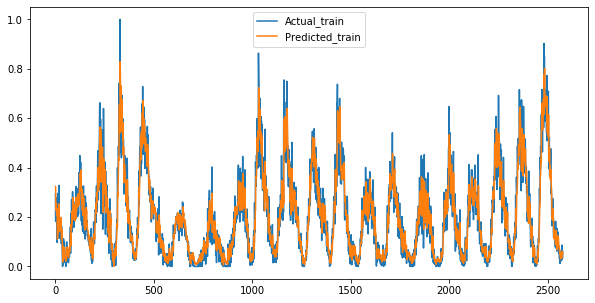

In [39]:
df1.plot(figsize=(10,5))

### 10. Performance Evaluation on Training Data

In [40]:
import math
trainScore = math.sqrt(mean_squared_error(df1['Actual_train'],df1['Predicted_train']))
print('Train Score: %.6f RMSE' % (trainScore))
trainScore1 =mean_squared_error(df1['Actual_train'],df1['Predicted_train'])
print('Train Score: %.6f MSE' % (trainScore1))

Train Score: 0.061923 RMSE
Train Score: 0.003835 MSE


### 11. Prediction on Test data

In [41]:
y_pred_test=regressor.predict(x_test)

In [42]:
y_pred_test

array([[0.31631167],
       [0.33584514],
       [0.35511455],
       [0.39901898],
       [0.41043579],
       [0.39531674],
       [0.36451694],
       [0.34005307],
       [0.4135726 ],
       [0.37347563],
       [0.35908991],
       [0.38068088],
       [0.40074163],
       [0.38920428],
       [0.3409609 ],
       [0.36762584],
       [0.37840948],
       [0.3992843 ],
       [0.43231437],
       [0.37820542],
       [0.41308268],
       [0.38257436],
       [0.35067376],
       [0.3557641 ],
       [0.33316214],
       [0.34683134],
       [0.34199544],
       [0.33760159],
       [0.35931361],
       [0.39609911],
       [0.36639324],
       [0.37073663],
       [0.39673663],
       [0.36943122],
       [0.38396504],
       [0.32982439],
       [0.34570633],
       [0.33224894],
       [0.32204694],
       [0.31603874],
       [0.32585395],
       [0.29134192],
       [0.2644316 ],
       [0.26478933],
       [0.22839562],
       [0.20645926],
       [0.25186814],
       [0.213

In [43]:
df_test_predicted=pd.DataFrame(data=y_pred_test, columns=['Predicted_test'])

In [44]:
df_test_predicted

,Predicted_test
0,0.316312
1,0.335845
2,0.355115
3,0.399019
4,0.410436
...,...
622,0.022370
623,0.015527
624,0.018093
625,0.017384


In [45]:
df_test_actual=pd.DataFrame(data=y_test,columns=['Actual_test'])
df_test_actual

,Actual_test
0,0.313913
1,0.335510
2,0.449523
3,0.433199
4,0.398041
...,...
622,0.001256
623,0.002762
624,0.001005
625,0.001256


In [46]:
df2=pd.concat([df_test_actual,df_test_predicted],axis=1)

In [47]:
df2

,Actual_test,Predicted_test
0,0.313913,0.316312
1,0.335510,0.335845
2,0.449523,0.355115
3,0.433199,0.399019
4,0.398041,0.410436
...,...,...
622,0.001256,0.022370
623,0.002762,0.015527
624,0.001005,0.018093
625,0.001256,0.017384


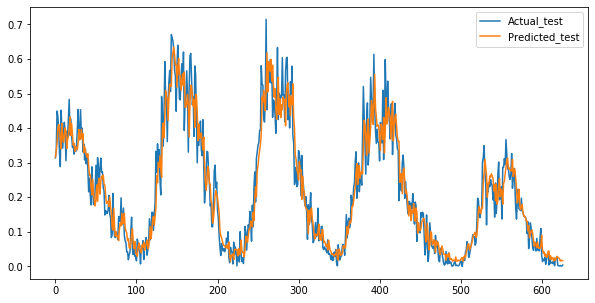

In [48]:
df2.plot(figsize=(10,5))

### 12. Performance Evaluation on Test data

In [49]:
import math
testScore = math.sqrt(mean_squared_error(df2['Actual_test'],df2['Predicted_test']))
print('Test Score: %.6f RMSE' % (testScore))
testScore1 =mean_squared_error(df2['Actual_test'],df2['Predicted_test'])
print('Test Score: %.6f MSE' % (testScore1))

Test Score: 0.057145 RMSE
Test Score: 0.003266 MSE
